In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [15]:
df = pd.read_csv("/content/sample_data/gurgaon_properties_cleaned_v2.csv")

In [16]:
df.head(10)

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,signature global park 4,sector 36,0.82,7585.0,1081.0,Super Built up area 1081(100.43 sq.m.)Carpet a...,3,2,2,...,1081.0,NaN,650.0,0,0,0,0,0,0,8
1,flat,smart world gems,sector 89,0.95,8600.0,1105.0,Carpet area: 1103 (102.47 sq.m.),2,2,2,...,NaN,NaN,1103.0,1,1,0,0,0,0,38
2,flat,pyramid elite,sector 86,0.46,79.0,58228.0,Carpet area: 58141 (5401.48 sq.m.),2,2,1,...,NaN,NaN,58141.0,0,0,0,0,0,0,15
3,flat,breez global hill view,sohna road,0.32,5470.0,585.0,Built Up area: 1000 (92.9 sq.m.)Carpet area: 5...,2,2,1,...,NaN,1000.00,585.0,0,0,0,0,0,0,49
4,flat,bestech park view sanskruti,sector 92,1.60,8020.0,1995.0,Super Built up area 1995(185.34 sq.m.)Built Up...,3,4,3+,...,1995.0,1615.00,1476.0,0,1,0,0,1,1,174
5,flat,suncity avenue,sector 102,0.48,9022.0,532.0,Super Built up area 632(58.71 sq.m.)Carpet are...,2,2,1,...,632.0,NaN,532.0,0,0,1,0,0,0,159
6,flat,paras quartier,gwal pahari,7.50,14018.0,5350.0,Super Built up area 5350(497.03 sq.m.),4,4,3+,...,5350.0,NaN,NaN,0,1,0,1,1,1,49
7,flat,experion the heartsong,sector 108,2.00,8554.0,2338.0,Super Built up area 2338(217.21 sq.m.),3,3,3+,...,2338.0,NaN,NaN,0,1,0,0,0,0,95
8,flat,adani m2k oyster grande,sector 102,1.90,9105.0,2087.0,Super Built up area 1889(175.49 sq.m.),3,4,3,...,1889.0,NaN,NaN,0,1,0,0,0,0,165
9,house,independent,sector 105,1.20,10122.0,1186.0,Plot area 1185.51(110.14 sq.m.),6,2,1,...,NaN,1185.51,NaN,0,0,0,0,0,0,9


In [17]:
df.shape

(3803, 23)

In [18]:
df.duplicated().sum()

np.int64(126)

In [19]:
df.drop_duplicates(inplace=True)

In [20]:
df.shape

(3677, 23)

<Axes: xlabel='property_type'>

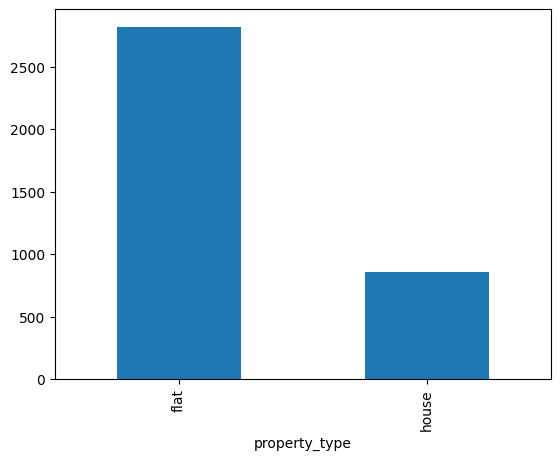

In [21]:
# property is a catogorical column so that chech the frequency of each catogory
df["property_type"].value_counts().plot(kind = "bar")

**mejority is flat 75% and 25% houses**

# society

In [22]:
df["society"].value_counts()

,count
society,
independent,486
tulip violet,75
ss the leaf,73
shapoorji pallonji joyville gurugram,42
dlf new town heights,42
...,...
rail vihar cghs,1
rk tower,1
antriksh green,1


**there are 486 independent property**
**and other property belong to some apartment ex-Tulip** **violet cotain 75 property and all**

**so i am creating new data frame where i remove this independent propery**

**so i perform the cumulative sum and by this i get the top 75 data so i get that 50% data** **come from top 75 and other 50% come from 25**

In [23]:
df[df['society'] != 'independent']['society'].value_counts(normalize=True).cumsum().head(75)

,proportion
society,
tulip violet,0.023511
ss the leaf,0.046395
shapoorji pallonji joyville gurugram,0.059561
dlf new town heights,0.072727
signature global park,0.083699
...,...
ramsons kshitij,0.490282
ats kocoon,0.494357
ansal heights 86,0.498433


In [24]:
society_counts = df['society'].value_counts()

# Frequency distribution for societies
frequency_bins = {
    "Very High (>100)": (society_counts > 100).sum(),
    "High (50-100)": ((society_counts >= 50) & (society_counts <= 100)).sum(),
    "Average (10-49)": ((society_counts >= 10) & (society_counts < 50)).sum(),
    "Low (2-9)": ((society_counts > 1) & (society_counts < 10)).sum(),
    "Very Low (1)": (society_counts == 1).sum()
}
frequency_bins

{'Very High (>100)': np.int64(1),
 'High (50-100)': np.int64(2),
 'Average (10-49)': np.int64(92),
 'Low (2-9)': np.int64(273),
 'Very Low (1)': np.int64(308)}

<Axes: xlabel='society'>

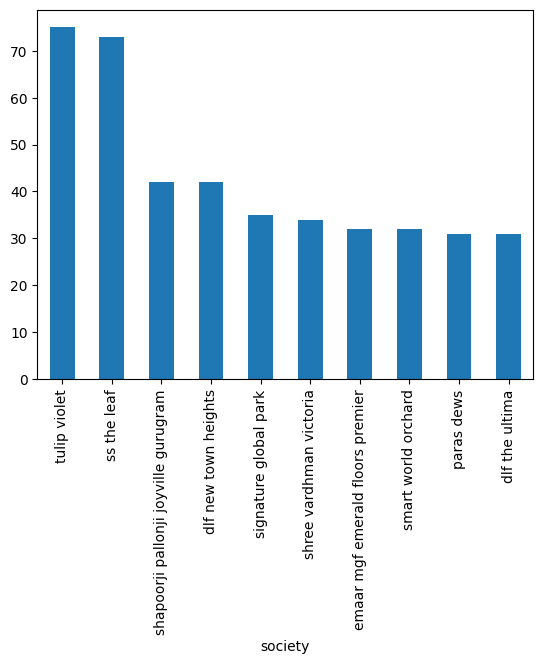

In [25]:
df[df['society'] != 'independent']['society'].value_counts().head(10).plot(kind='bar')

Around 13% property comes under independent tag
675 property
there are 486 independent property and other property belong to some apartment ex-Tulip violet cotain 75 property and all

so i am creating new data frame where i remove this independent propery

so i perform the cumulative sum and by this i get the top 75 data so i get that 50% data come from top 75 and other 50% come from 25

In [26]:
df[df['society'].isnull()]

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,...,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
2693,flat,NaN,sector 78,0.6,3692.0,1625.0,Built Up area: 1625 (150.97 sq.m.),2,2,0,...,NaN,1625.0,NaN,0,0,0,0,0,0,0


# **Sector**

In [27]:
df["sector"].head(10)

,sector
0,sector 36
1,sector 89
2,sector 86
3,sohna road
4,sector 92
5,sector 102
6,gwal pahari
7,sector 108
8,sector 102
9,sector 105


In [28]:
df["sector"].value_counts()

,count
sector,
sohna road,166
sector 85,108
sector 102,107
sector 92,100
sector 69,93
...,...
sector 30,5
sector 80,5
sector 73,3


<Axes: xlabel='sector'>

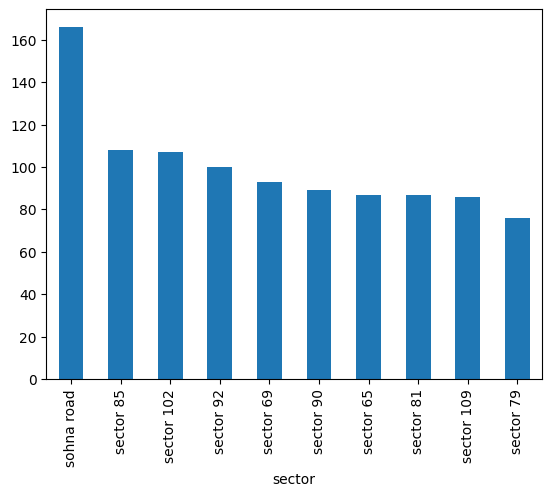

In [29]:
df['sector'].value_counts().head(10).plot(kind='bar')

**104 sectors having high carinality**

In [30]:
# Frequency distribution for sectors
sector_counts = df['sector'].value_counts()

sector_frequency_bins = {
    "Very High (>100)": (sector_counts > 100).sum(),
    "High (50-100)": ((sector_counts >= 50) & (sector_counts <= 100)).sum(),
    "Average (10-49)": ((sector_counts >= 10) & (sector_counts < 50)).sum(),
    "Low (2-9)": ((sector_counts > 1) & (sector_counts < 10)).sum(),
    "Very Low (1)": (sector_counts == 1).sum()
}

sector_frequency_bins

{'Very High (>100)': np.int64(3),
 'High (50-100)': np.int64(25),
 'Average (10-49)': np.int64(60),
 'Low (2-9)': np.int64(16),
 'Very Low (1)': np.int64(0)}

# **Price**

In [31]:
# this is main column because my model will predict the price of your apartment as per user requirement
df["price"].isnull().sum()

np.int64(17)

In [32]:
df["price"].describe()

,price
count,3660.000000
mean,2.533664
std,2.980623
min,0.070000
25%,0.950000
50%,1.520000
75%,2.750000
max,31.500000


<Axes: xlabel='price', ylabel='Count'>

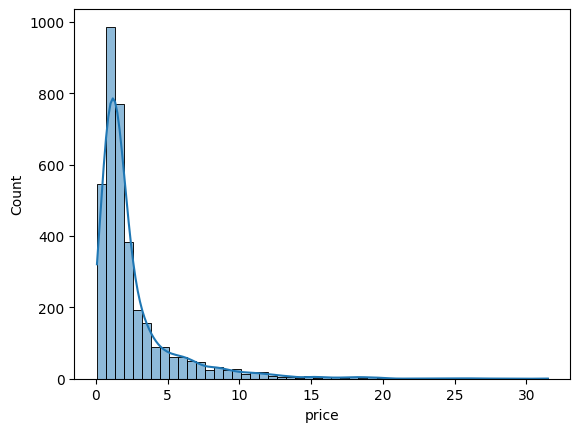

In [33]:
sns.histplot(df['price'], kde=True, bins=50)

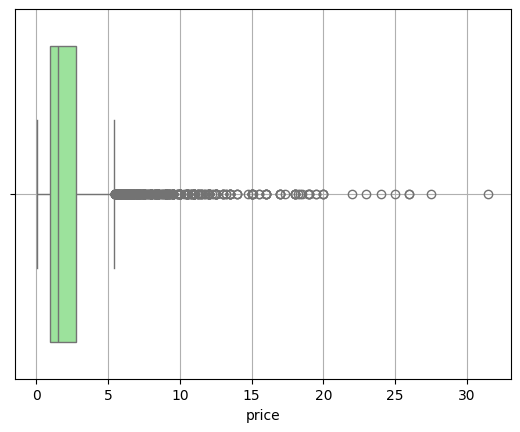

In [34]:
sns.boxplot(x=df['price'], color='lightgreen')
plt.grid()

Descriptive Statistics:
Count: There are 3,660 non-missing price entries.

Mean Price: The average price is approximately 2.53 crores.

Median Price: The median (or 50th percentile) price is 1.
52 crores

Standard Deviation: The prices have a standard deviation of 2.98, indicating variability in the prices.

Range: The prices range from a minimum of 0.07 crores to a maximum of 31.5 crores.

IQR: The interquartile range (difference between 75th and 25th percentile) is from 0.95 crores to 2.75 crores.

Visualizations
Distribution: The histogram indicates that most properties are priced in the lower range (below 5 crores), with a few properties going beyond 10 crores.

Box Plot: The box plot showcases the spread of the data and potential outliers. Properties priced above approximately 10 crores might be considered outliers as they lie beyond the upper whisker of the box plot.

Missing Values: There are 17 missing values in the price column.

In [35]:
# Skewness and Kurtosis
skewness = df['price'].skew()
kurtosis = df['price'].kurt()

print(skewness,kurtosis)
# if kurtosi value is more than 3 then it mean it is kurtosis (outliers are in the data)

3.2791704733134623 14.933372629214258


**Skewness:** The distribution has a positive skew of approximately 3.28. This means the distribution is skewed to the right, with most properties having lower prices and a few having high prices.

**Kurtosis:** The kurtosis value is approximately 14.93. A value greater than 3 indicates a distribution with heavier tails and more outliers compared to a normal distribution.

In [36]:
# Quantile Analysis
quantiles = df['price'].quantile([0.01, 0.05, 0.95, 0.99])

quantiles

,price
0.01,0.250
0.05,0.370
0.95,8.500
0.99,15.264


1% Quantile: Only 1% of properties are priced below 0.25 crores.

5% Quantile: 5% of properties are priced below 0.37 crores.

95% Quantile: 95% of properties are priced below 8.5 crores.

99% Quantile: 99% of properties are priced below 15.26 crores, indicating that very few properties are priced above this value.

In [37]:
# Identify potential outliers using IQR method
Q1 = df['price'].describe()['25%']
Q3 = df['price'].describe()['75%']
IQR = Q3 - Q1

IQR

np.float64(1.8)

In [38]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(lower_bound, upper_bound)

-1.7500000000000002 5.45


# making a df from outliers

In [39]:
outliers = df[(df['price'] < lower_bound) | (df['price'] > upper_bound)]
outliers.shape

(425, 23)

In [40]:
outliers['price'].describe()

,price
count,425.000000
mean,9.235624
std,4.065259
min,5.460000
25%,6.460000
50%,8.000000
75%,10.750000
max,31.500000


<Axes: xlabel='price'>

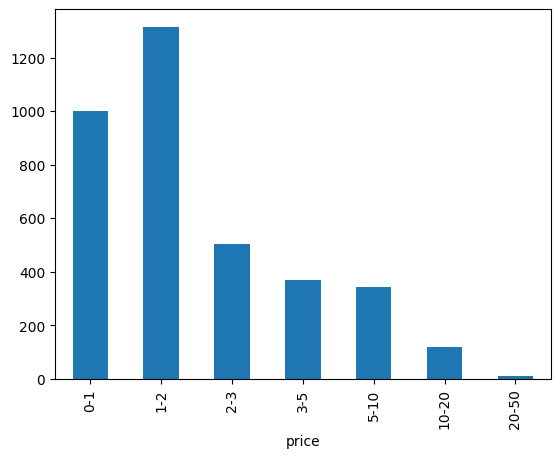

In [41]:
# price binning
bins = [0, 1, 2, 3, 5, 10, 20, 50]
bin_labels = ["0-1", "1-2", "2-3", "3-5", "5-10", "10-20", "20-50"]
pd.cut(df['price'], bins=bins, labels=bin_labels, right=False).value_counts().sort_index().plot(kind='bar')

The majority of properties are priced in the "1-2 crores" and "2-3 crores" ranges.

There's a significant drop in the number of properties priced above "5 crores."

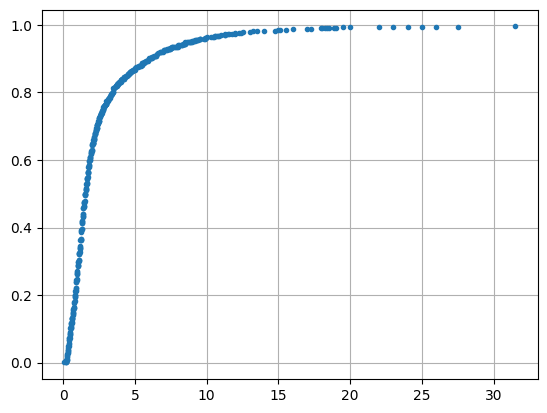

In [42]:
# ecdf plot cumulative sum graph and find percentage
ecdf = df['price'].value_counts().sort_index().cumsum() / len(df['price'])
plt.plot(ecdf.index, ecdf, marker='.', linestyle='none')
plt.grid()
# 85% data is less than 5cr
# 95% data is less than 10cr

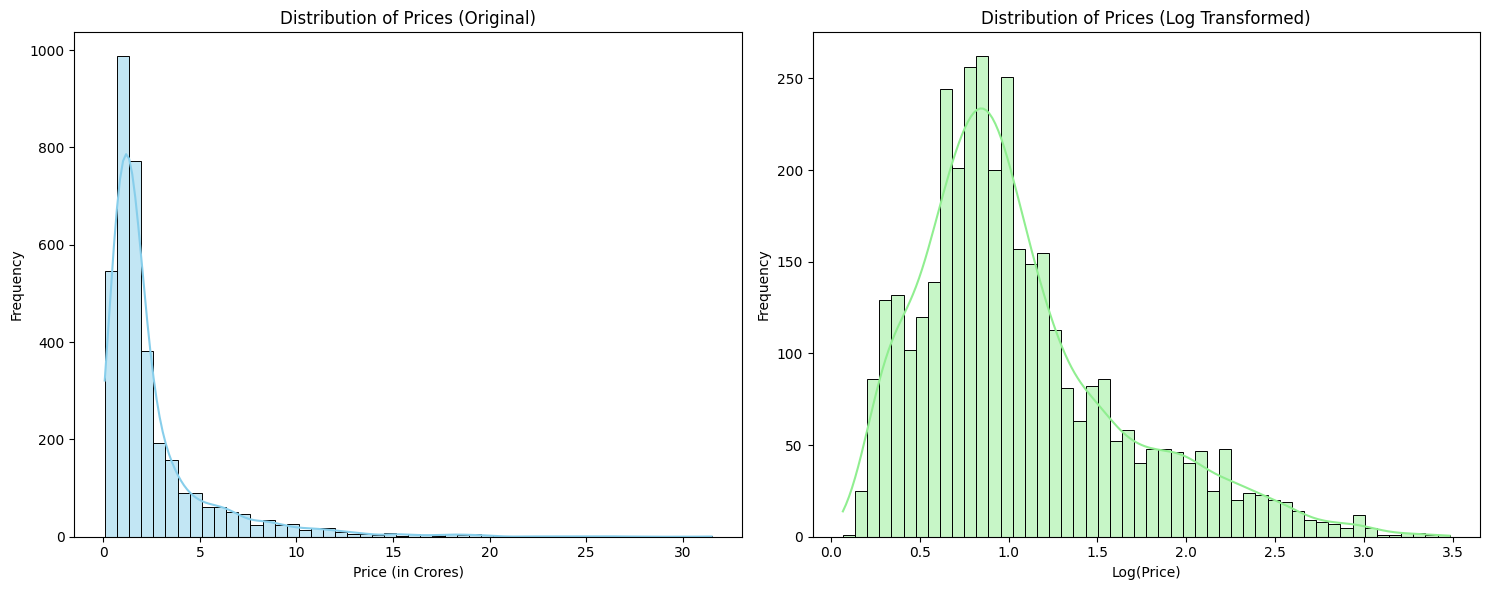

In [43]:
# feature transformation
plt.figure(figsize=(15, 6))

# Distribution plot without log transformation
plt.subplot(1, 2, 1)
sns.histplot(df['price'], kde=True, bins=50, color='skyblue')
plt.title('Distribution of Prices (Original)')
plt.xlabel('Price (in Crores)')
plt.ylabel('Frequency')

# Distribution plot with log transformation
plt.subplot(1, 2, 2)
sns.histplot(np.log1p(df['price']), kde=True, bins=50, color='lightgreen')
plt.title('Distribution of Prices (Log Transformed)')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

# if value of any appartment is 2.5 cr we take log

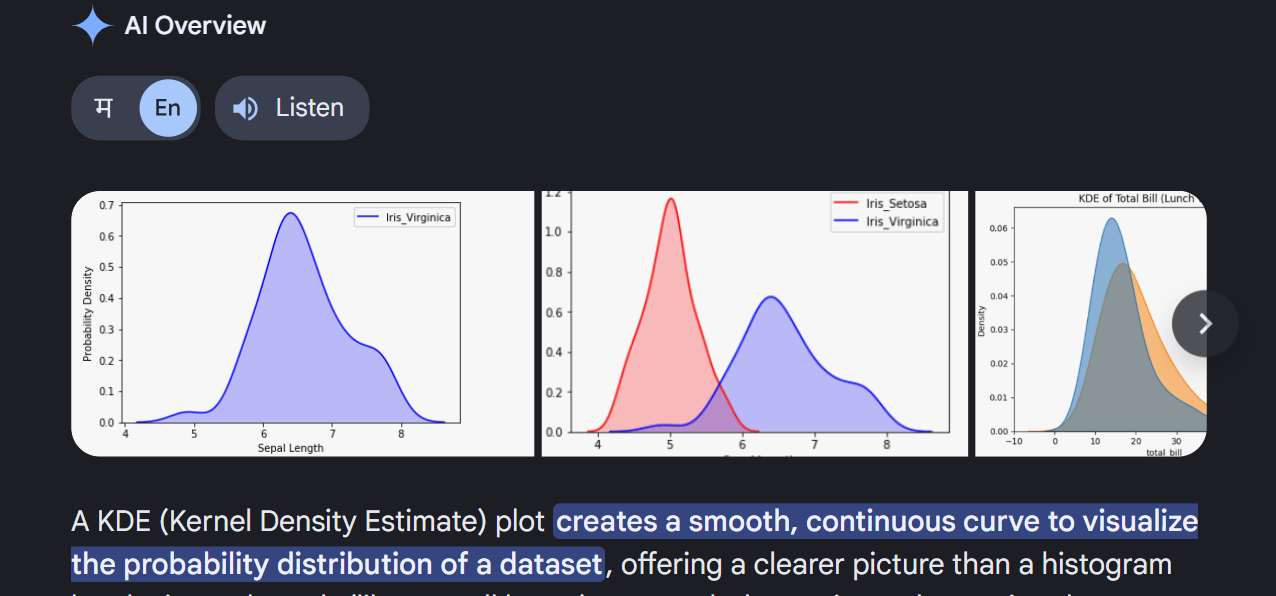


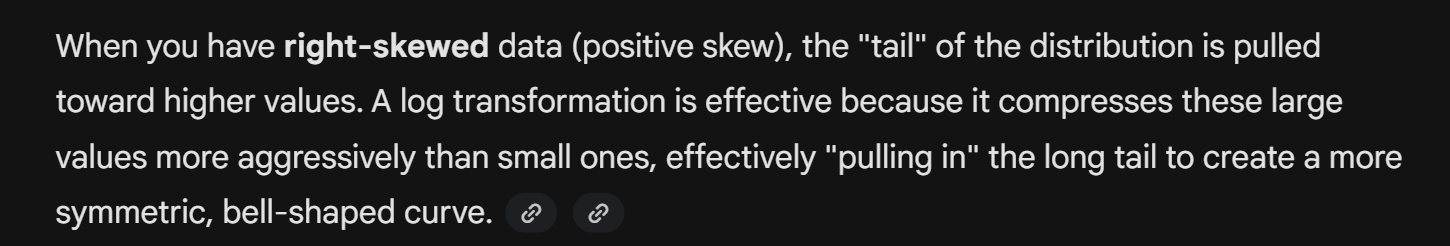

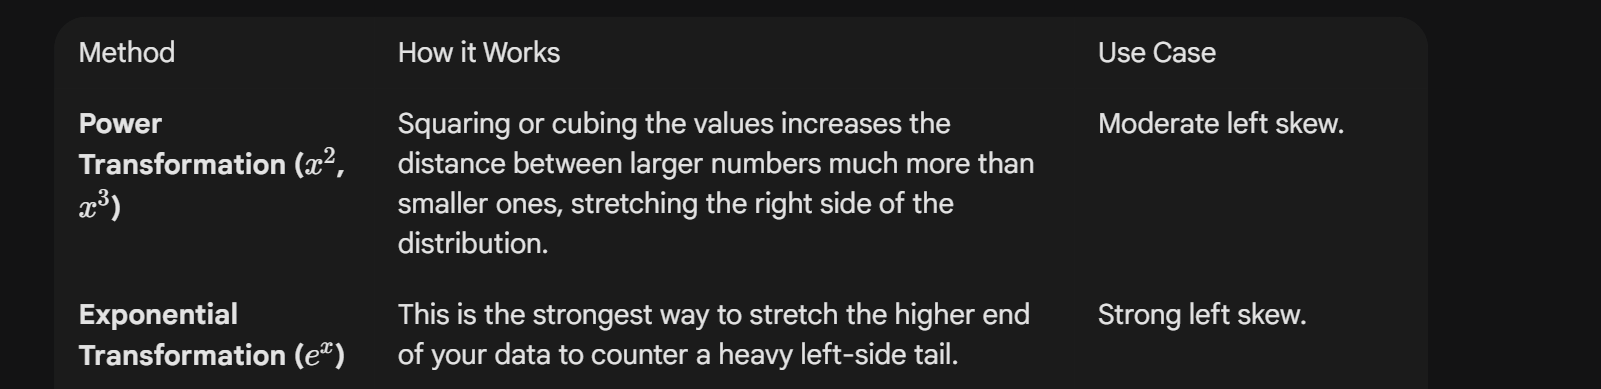



In [44]:
skewness = np.log1p(df['price']).skew()
kurtosis = np.log1p(df['price']).kurt()

print(skewness,kurtosis)

1.0740709565255318 0.9646692415449296


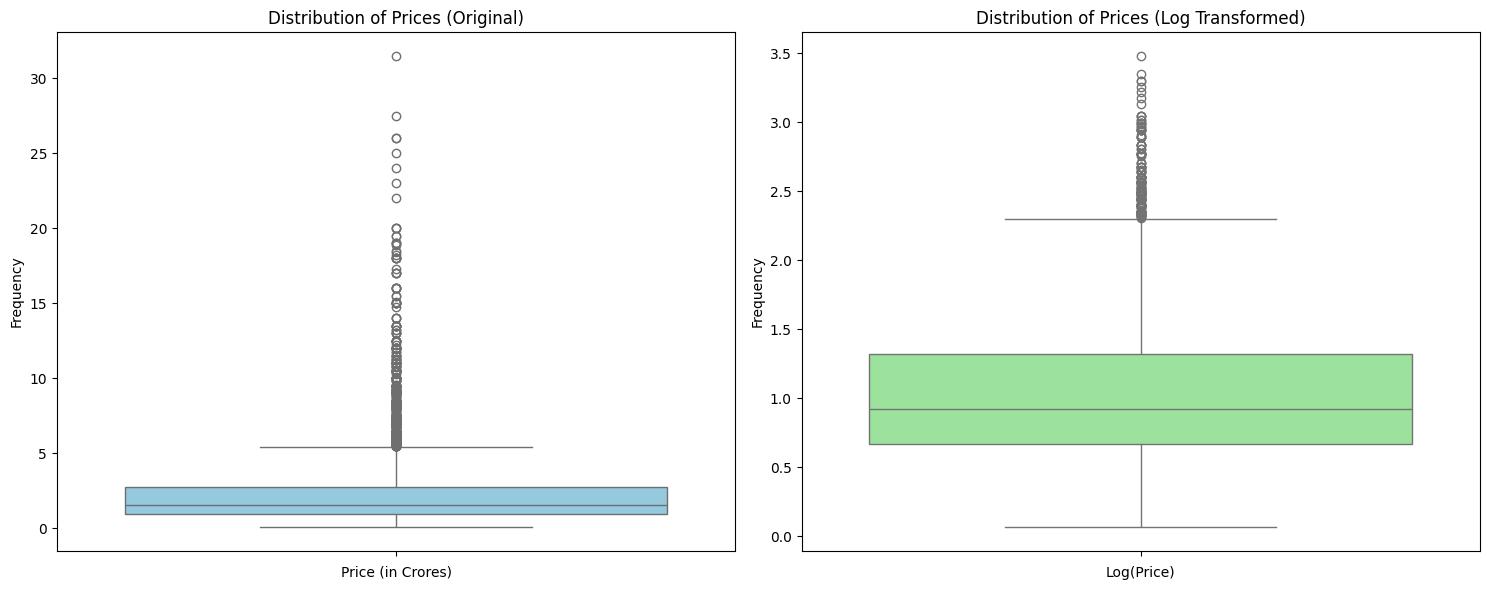

In [45]:
plt.figure(figsize=(15, 6))

# Distribution plot without log transformation
plt.subplot(1, 2, 1)
sns.boxplot(df['price'], color='skyblue')
plt.title('Distribution of Prices (Original)')
plt.xlabel('Price (in Crores)')
plt.ylabel('Frequency')

# Distribution plot with log transformation
plt.subplot(1, 2, 2)
sns.boxplot(np.log1p(df['price']), color='lightgreen')
plt.title('Distribution of Prices (Log Transformed)')
plt.xlabel('Log(Price)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()

np.log1p(x): This function computes the natural logarithm of 1+x. It's designed to provide more accurate results for values of x that are very close to zero.

Using **np.log1p** helps in transforming the price column while ensuring that any value (including zero, if present) is handled appropriately. When we need to reverse the transformation, we can use np.expm1 which computes e^x-1

# **price_per_sqft**

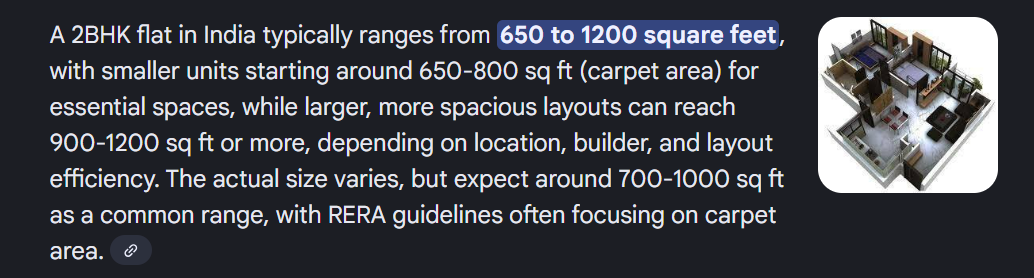



In [46]:
df["price_per_sqft"].isnull().sum()

np.int64(17)

In [47]:
df["price_per_sqft"].describe()

,price_per_sqft
count,3660.000000
mean,13892.668306
std,23210.067190
min,4.000000
25%,6817.250000
50%,9020.000000
75%,13880.500000
max,600000.000000


In [48]:
df["price_per_sqft"].value_counts()

,count
price_per_sqft,
10000.0,27
8000.0,19
5000.0,17
12500.0,14
11111.0,13
...,...
8554.0,1
14018.0,1
8020.0,1


<Axes: xlabel='price_per_sqft', ylabel='Count'>

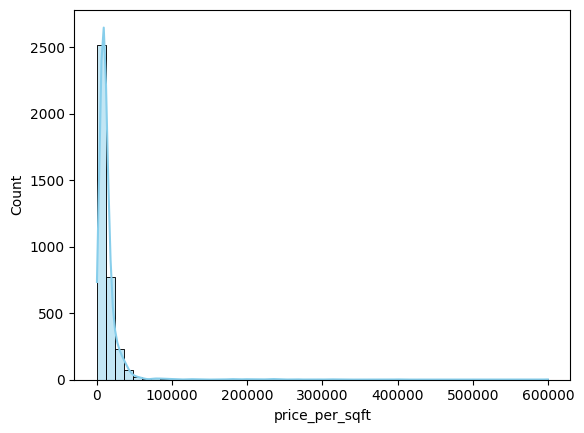

In [49]:
sns.histplot(df['price_per_sqft'], bins=50, color='skyblue', kde=True)

<Axes: ylabel='price_per_sqft'>

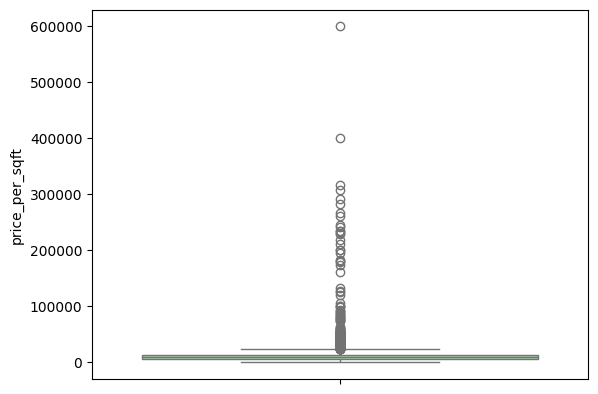

In [50]:
sns.boxplot(df['price_per_sqft'], color='lightgreen')

The box plot clearly shows several outliers, especially on the higher side. The interquartile range (IQR) is relatively compact, but there are many data points beyond the "whiskers" of the box plot, indicating potential outlier

**Observations**

Potential Outliers
Right Skewed
17 missing values

# bedRoom

In [51]:
df["bedRoom"].isnull().sum()

np.int64(0)

<Axes: xlabel='bedRoom'>

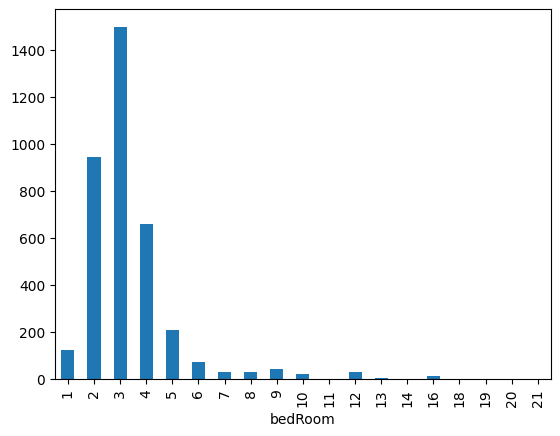

In [52]:
df['bedRoom'].value_counts().sort_index().plot(kind='bar')

<Axes: ylabel='proportion'>

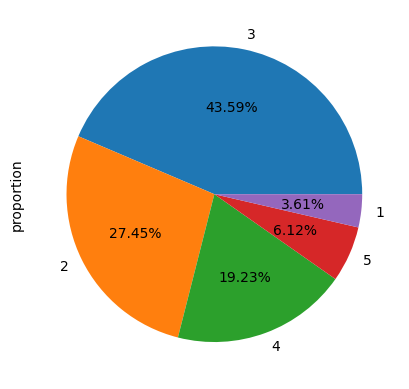

In [53]:
df['bedRoom'].value_counts(normalize=True).head().plot(kind='pie',autopct='%0.2f%%')

# bathroom

In [54]:
df["bathroom"].isnull().sum()

np.int64(0)

<Axes: xlabel='bathroom'>

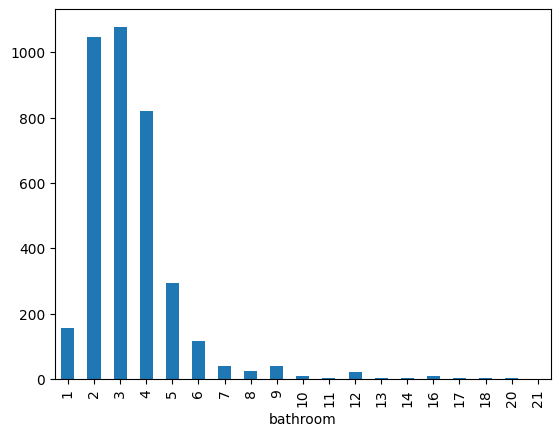

In [55]:
df['bathroom'].value_counts().sort_index().plot(kind='bar')

<Axes: ylabel='proportion'>

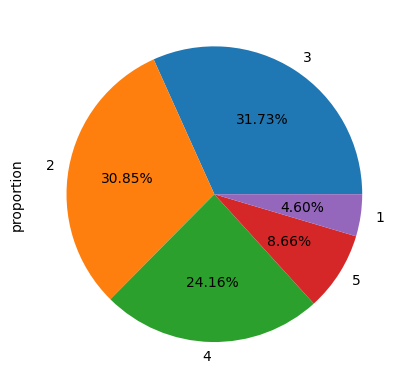

In [56]:
df['bathroom'].value_counts(normalize=True).head().plot(kind='pie',autopct='%0.2f%%')

# balcony

<Axes: xlabel='balcony'>

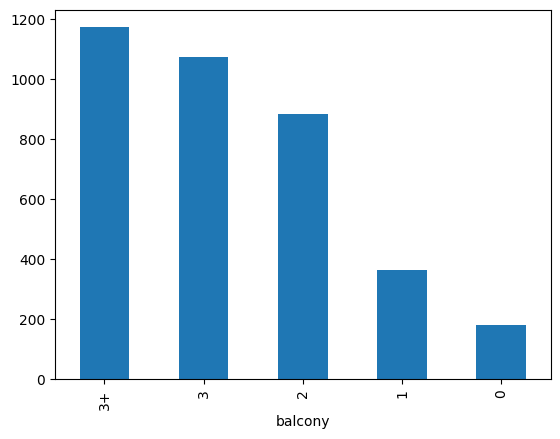

In [57]:
df['balcony'].value_counts().plot(kind='bar')

<Axes: ylabel='proportion'>

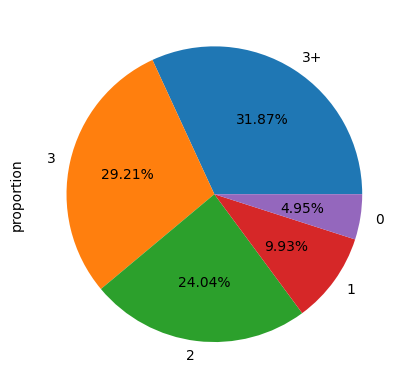

In [58]:
df['balcony'].value_counts(normalize=True).head().plot(kind='pie',autopct='%0.2f%%')

# floorNum

In [59]:
df.iloc[:,10:].head()

,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,2.0,NaN,New Property,1081.0,NaN,650.0,0,0,0,0,0,0,8
1,4.0,NaN,New Property,NaN,NaN,1103.0,1,1,0,0,0,0,38
2,0.0,NaN,Under Construction,NaN,NaN,58141.0,0,0,0,0,0,0,15
3,17.0,NaN,New Property,NaN,1000.0,585.0,0,0,0,0,0,0,49
4,10.0,North-West,Relatively New,1995.0,1615.0,1476.0,0,1,0,0,1,1,174


In [60]:
df['floorNum'].isnull().sum()

np.int64(19)

In [61]:
df['floorNum'].describe()

,floorNum
count,3658.000000
mean,6.798250
std,6.012454
min,0.000000
25%,2.000000
50%,5.000000
75%,10.000000
max,51.000000


<Axes: xlabel='floorNum'>

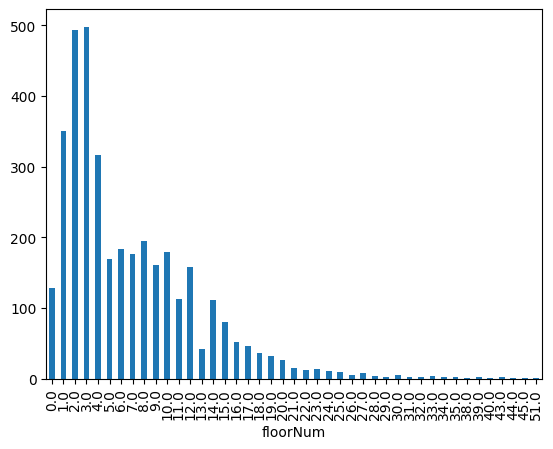

In [62]:
df['floorNum'].value_counts().sort_index().plot(kind='bar')

<Axes: ylabel='floorNum'>

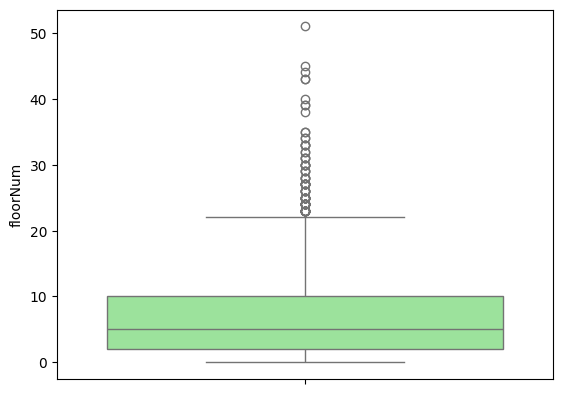

In [63]:
sns.boxplot(df['floorNum'], color='lightgreen')

The majority of the properties lie between the ground floor (0) and the 25th floor.

Floors 1 to 4 are particularly common, with the 3rd floor being the most frequent.

There are a few properties located at higher floors, but their frequency is much lower.

The box plot reveals that the majority of the properties are concentrated around the lower floors. The interquartile range (IQR) lies between approximately the 2nd and 10th floors.

Data points beyond the "whiskers" of the box plot, especially on the higher side, indicate potential outliers.

In [64]:
df["facing"].isnull().sum()

np.int64(1045)

# agePossession

In [65]:
df['agePossession'].isnull().sum()

np.int64(0)

In [66]:
df['agePossession'].value_counts()

,count
agePossession,
Relatively New,1646
New Property,593
Moderately Old,563
Undefined,306
Old Property,303
Under Construction,266


# areas

In [67]:
df['super_built_up_area'].isnull().sum()

np.int64(1802)

In [68]:
df['super_built_up_area'].describe()

,super_built_up_area
count,1875.000000
mean,1925.237627
std,764.172177
min,89.000000
25%,1479.500000
50%,1828.000000
75%,2215.000000
max,10000.000000


<Axes: xlabel='super_built_up_area', ylabel='Count'>

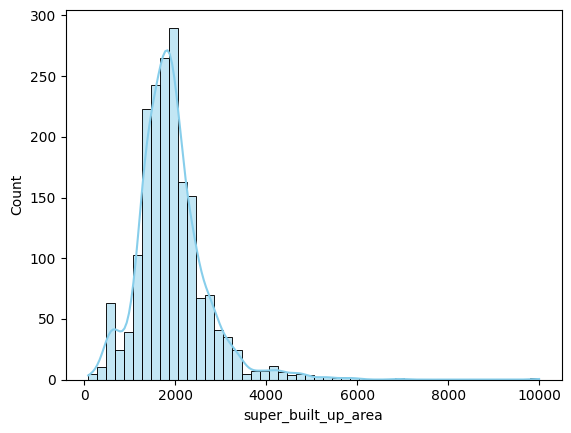

In [69]:
sns.histplot(df['super_built_up_area'].dropna(), bins=50, color='skyblue', kde=True)

<Axes: ylabel='super_built_up_area'>

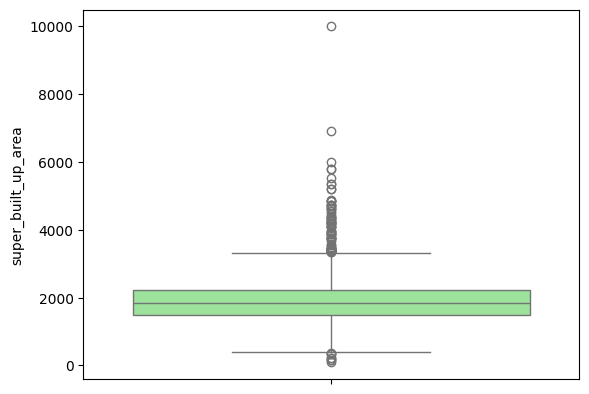

In [70]:
sns.boxplot(df['super_built_up_area'].dropna(), color='lightgreen')

Most properties have a super built-up area ranging between approximately 1,000 sq.ft and 2,500 sq.ft.

There are a few properties with a significantly larger area, leading to a right-skewed distribution.

The interquartile range (IQR) lies between roughly 1,480 sq.ft and 2,215 sq.ft, indicating that the middle 50% of the properties fall within this range.

There are several data points beyond the upper "whisker" of the box plot, indicating potential outliers. These are properties with an unusually large super built-up area.

In [71]:
df['built_up_area'].isnull().sum()

np.int64(1987)

In [72]:
df['built_up_area'].describe()

,built_up_area
count,1690.000000
mean,2379.585816
std,17942.880237
min,2.000000
25%,1100.000000
50%,1650.000000
75%,2400.000000
max,737147.000000


<Axes: xlabel='built_up_area', ylabel='Count'>

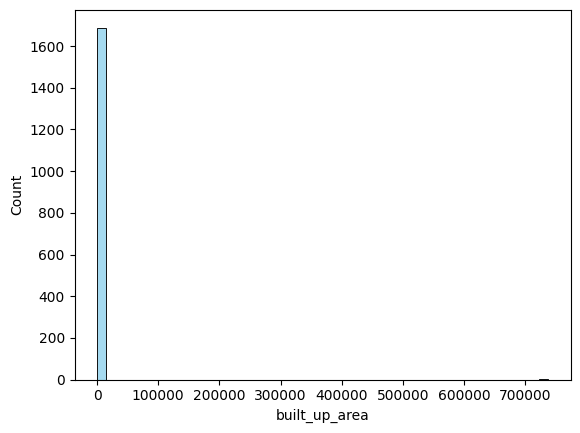

In [73]:
sns.histplot(df['built_up_area'].dropna(), bins=50, color='skyblue', kde=False)

<Axes: ylabel='built_up_area'>

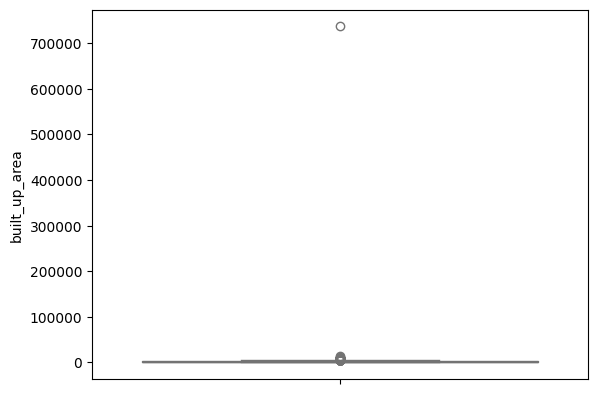

In [74]:
sns.boxplot(df['built_up_area'].dropna(), color='lightgreen')

Most properties have a built-up area ranging roughly between 500 sq.ft and 3,500 sq.ft.

There are very few properties with a much larger built-up area, leading to a highly right-skewed distribution.

The box plot confirms the presence of significant outliers on the higher side. The data's interquartile range (IQR) is relatively compact, but the "whiskers" of the box plot are stretched due to the outliers.

The presence of extreme values, especially on the higher side, suggests that there may be outliers or data errors.

This could also be due to some properties being exceptionally large, like a commercial complex or an entire building being listed.

In [75]:
df['carpet_area'].isnull().sum()

np.int64(1805)

In [76]:
df['carpet_area'].describe()

,carpet_area
count,1872.000000
mean,2529.179507
std,22799.836449
min,15.000000
25%,843.000000
50%,1300.000000
75%,1790.000000
max,607936.000000


<Axes: xlabel='carpet_area', ylabel='Count'>

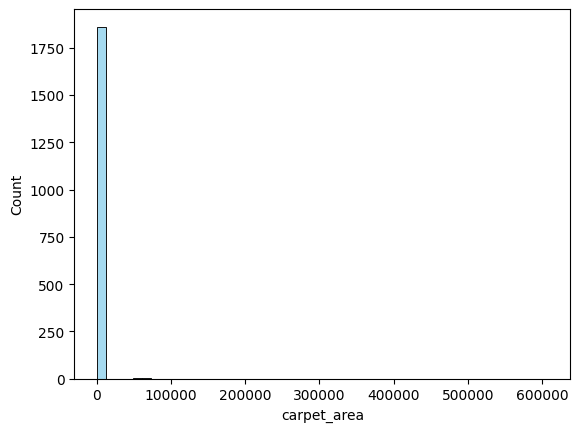

In [77]:
sns.histplot(df['carpet_area'].dropna(), bins=50, color='skyblue', kde=False)

<Axes: ylabel='carpet_area'>

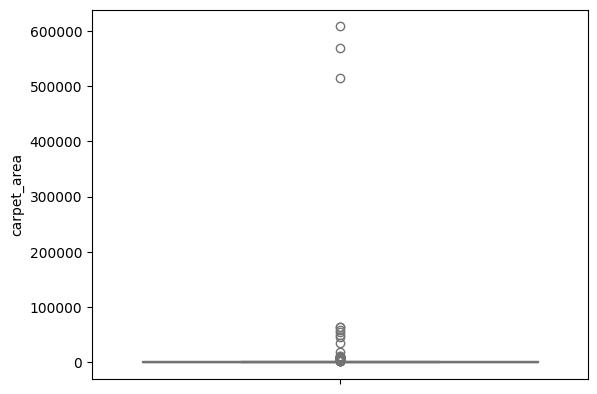

In [78]:
sns.boxplot(df['carpet_area'].dropna(), color='lightgreen')

In [79]:
df.iloc[:,16:]

,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,0,0,0,0,0,0,8
1,1,1,0,0,0,0,38
2,0,0,0,0,0,0,15
3,0,0,0,0,0,0,49
4,0,1,0,0,1,1,174
...,...,...,...,...,...,...,...
3798,0,0,0,0,0,0,73
3799,1,1,1,1,0,0,160
3800,0,0,0,0,0,1,67
3801,1,1,1,1,0,0,76


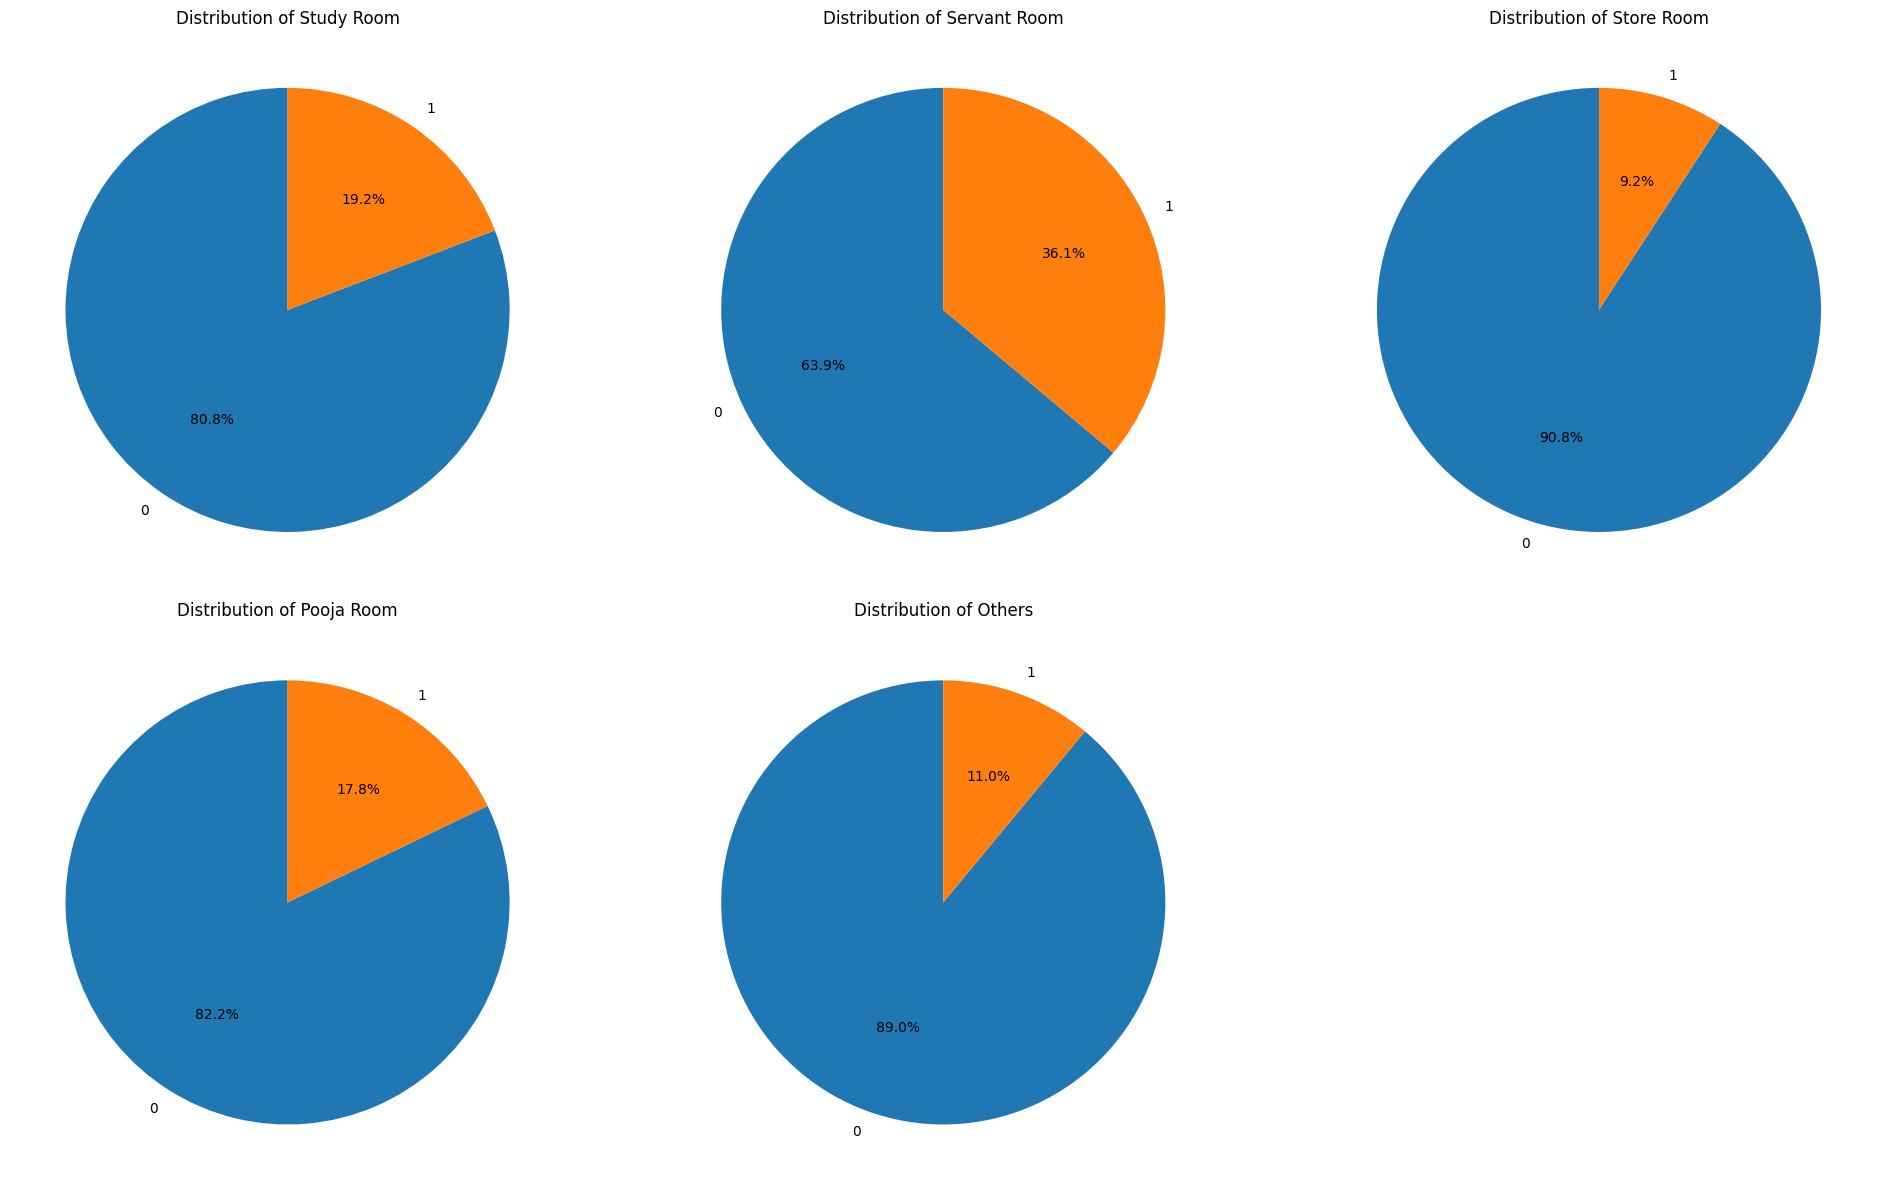

In [80]:
plt.figure(figsize=(20, 12))

# Create a subplot of pie charts for each room type
for idx, room in enumerate(['study room','servant room','store room','pooja room','others'], 1):
    ax = plt.subplot(2, 3, idx)
    df[room].value_counts().plot.pie(autopct='%1.1f%%', startangle=90, ax=ax)
    plt.title(f'Distribution of {room.title()}')
    plt.ylabel('')

plt.tight_layout()
plt.show()

In [81]:
df['furnishing_type'].value_counts()

,count
furnishing_type,
0,2411
1,1059
2,207


unfernish,semi, fernished

<Axes: ylabel='count'>

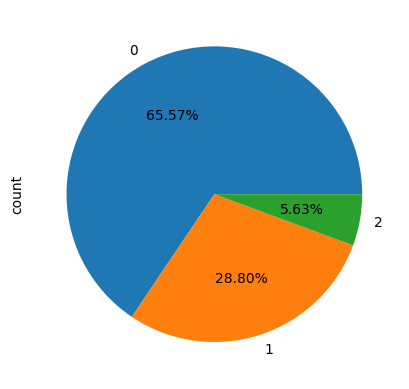

In [82]:
df['furnishing_type'].value_counts().plot(kind='pie',autopct='%0.2f%%')

# luxury score

In [83]:
df['luxury_score'].isnull().sum()

np.int64(0)

In [84]:
df['luxury_score'].describe()

,luxury_score
count,3677.000000
mean,71.512918
std,53.059082
min,0.000000
25%,31.000000
50%,59.000000
75%,110.000000
max,174.000000


<Axes: xlabel='luxury_score', ylabel='Count'>

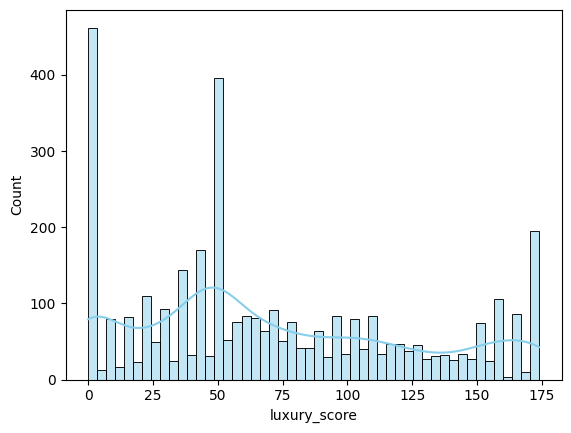

In [85]:
sns.histplot(df['luxury_score'], bins=50, color='skyblue', kde=True)

<Axes: ylabel='luxury_score'>

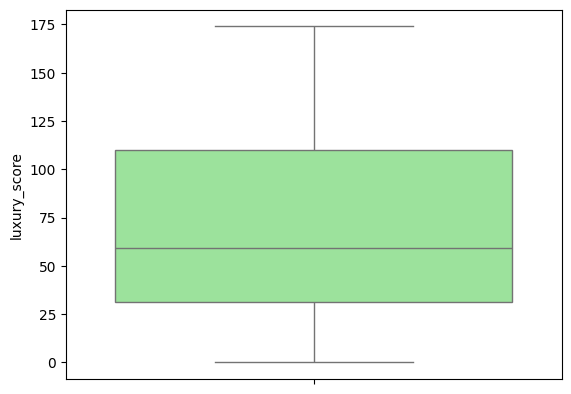

In [86]:
sns.boxplot(df['luxury_score'], color='lightgreen')

The luxury score distribution has multiple peaks, suggesting a multi-modal distribution. There's a significant number of properties with lower luxury scores (around 0-50), and another peak is observed around the 110-130 range.

The box plot reveals that the majority of the properties have luxury scores between approximately 30 and 110. The interquartile range (IQR) lies between these values.

# **Pandas Profilling Report --> Autometed EDA SETUP**

# detail library --> Auto EDA generater